### **IT trends analysis | Main analysis | Data exploration**

**Data source:** survey_data_cleaned.csv

**Scenario:** Perform exploratory analysis

Check distribution based on:
* Compensation (ConvertedComp)
* Gender
* Age

**Skills demonstrated:**
* Python (Pandas, Seaborn, Matplotlib, Numpy)
* Descriptive statistics
* Data visualization
* Clean coding

**Performed by:** Jarek Krzysztofik

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 1. Load

In [5]:
df = pd.read_csv(r'C:\Users\krzys\Desktop\Python\IBM DA Capstone Project_Portfolio version\2. Data_preparation\survey_data_cleaned.csv')

## 2. Basics

In [6]:
df.head()

,Unnamed: 0,Respondent,MainBranch,Country,EdLevel,UndergradMajor,DevType,YearsCode,CompTotal,CompFreq,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,OpSys,Age,Gender,NormAnnualComp
0,0,4,I am a developer by profession,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Developer, full-stack",3.0,61000.0,Yearly,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,Windows,22.0,Man,61000.0
1,1,9,I am a developer by profession,New Zealand,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","Database administrator;Developer, back-end;Dev...",12.0,138000.0,Yearly,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,MacOS,23.0,Man,138000.0
2,2,13,I am a developer by profession,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,17.0,90000.0,Yearly,...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Windows,28.0,Man,90000.0
3,3,16,I am a developer by profession,United Kingdom,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,"Developer, full-stack",10.0,29000.0,Monthly,...,MongoDB;Microsoft SQL Server;MySQL,Elasticsearch;MongoDB;Microsoft SQL Server;SQLite,NaN,AWS;Google Cloud Platform;Microsoft Azure,Angular/Angular.js;ASP.NET;jQuery,Angular/Angular.js;ASP.NET;React.js,Windows,26.0,Man,348000.0
4,4,17,I am a developer by profession,Australia,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Developer, back-end;Developer, front-end;Devel...",5.0,90000.0,Yearly,...,MongoDB;PostgreSQL,Elasticsearch;Firebase;MongoDB;PostgreSQL,Arduino;Docker;Heroku;Raspberry Pi;WordPress,Docker,Angular/Angular.js;Express;Spring,Angular/Angular.js;Express;React.js;Spring;Vue.js,Linux-based,29.0,Man,90000.0


In [7]:
df.shape  #rows, columns

(11241, 26)

In [8]:
df.dtypes

Unnamed: 0                  int64
Respondent                  int64
MainBranch                 object
Country                    object
EdLevel                    object
UndergradMajor             object
DevType                    object
YearsCode                 float64
CompTotal                 float64
CompFreq                   object
ConvertedComp             float64
WorkWeekHrs               float64
WorkLoc                    object
CodeRevHrs                float64
LanguageWorkedWith         object
LanguageDesireNextYear     object
DatabaseWorkedWith         object
DatabaseDesireNextYear     object
PlatformWorkedWith         object
PlatformDesireNextYear     object
WebFrameWorkedWith         object
WebFrameDesireNextYear     object
OpSys                      object
Age                       float64
Gender                     object
NormAnnualComp            float64
dtype: object

In [9]:
#Number of unique countries
len(df['Country'].unique())

135

## 3. Distribution

**3.1. ConvertedComp**

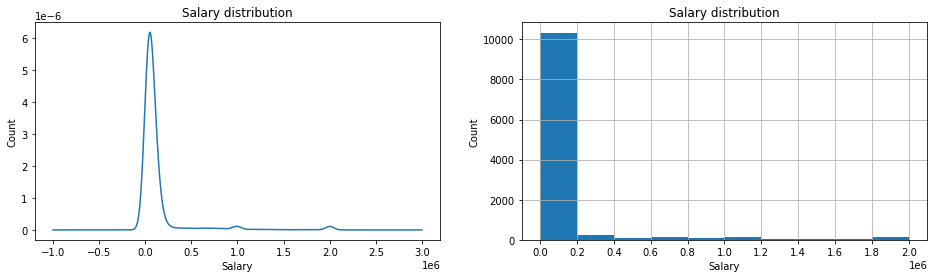

In [10]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

#Subplot 1
df.ConvertedComp.plot.density(figsize=(16,4), ax=ax0)
ax0.set_title('Salary distribution')
ax0.set_xlabel('Salary')
ax0.set_ylabel('Count')

#Subplot 2
count, bin_edges = np.histogram(df.ConvertedComp)

df.ConvertedComp.plot(kind='hist', 
                      xticks=bin_edges,
                      ax=ax1,
                      grid=True)
ax1.set_title('Salary distribution')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Count')

plt.show()

In [11]:
pd.DataFrame(df.ConvertedComp.describe())

,ConvertedComp
count,1.124100e+04
mean,1.266275e+05
std,2.854322e+05
min,0.000000e+00
25%,2.913600e+04
50%,5.774500e+04
75%,9.500000e+04
max,2.000000e+06


In [13]:
#Scientific notation is not that easy to process, therefore I'm re-calculating 
#the above manually for clarity. Adding kurtosis.

def cc_stats(column):

    count = df[column].count()
    mean = df[column].mean()
    median = df[column].median()
    std = df[column].std()  #sample std
    min = df[column].min()
    max = df[column].max()  
    kurtosis = df[column].kurtosis()  #based on the hist it is expected to be high
                                      #however, I'd like to see the actual value

    desc_summ = {'Count': count,
                'Mean': round(mean,1),
                'Median': median,
                'Std': round(std,1),
                'Min': round(min,1),
                'Max': round(max,1),
                'Kurtosis': round(kurtosis,1)}

    df_desc_summ = pd.DataFrame.from_dict(desc_summ, orient='index')
    df_desc_summ.set_axis(['Value'], axis=1, inplace=True)
    
    return df_desc_summ

cc_stats('ConvertedComp')

,Value
Count,11241.0
Mean,126627.5
Median,57745.0
Std,285432.2
Min,0.0
Max,2000000.0
Kurtosis,25.7


Based on the above charts and stats, it is clear that the distribution is far from normal. The histogram is right-skewed with very high kurtosis. The difference between mean and median is significant.

Additional outliers verification is required.

**3.2. Gender**

In [14]:
df.Gender.value_counts()

Man               10401
Woman               726
Non-conforming      114
Name: Gender, dtype: int64

In [15]:
#Median ConvertedComp by gender
man_median = df[df['Gender'] == 'Man'].ConvertedComp.median()
woman_median = df[df['Gender'] == 'Woman'].ConvertedComp.median()
nc_median = df[df['Gender'] == 'Non-conforming'].ConvertedComp.median()

#Mean ConvertedComp by gender
man_mean = df[df['Gender'] == 'Man'].ConvertedComp.mean()
woman_mean = df[df['Gender'] == 'Woman'].ConvertedComp.mean()
nc_mean = df[df['Gender'] == 'Non-conforming'].ConvertedComp.mean()

gens_comp_stats = {'N-c': {'Median': nc_median, 'Mean': nc_mean},
                   'Men': {'Median': man_median, 'Mean': man_mean},
                   'Women': {'Median': woman_median, 'Mean': woman_mean}}

df_gens_comp_stats = pd.DataFrame.from_dict(gens_comp_stats, orient='index')
df_gens_comp_stats

,Median,Mean
N-c,58596.0,137608.192982
Men,57745.0,128509.681761
Women,57745.0,97938.278237


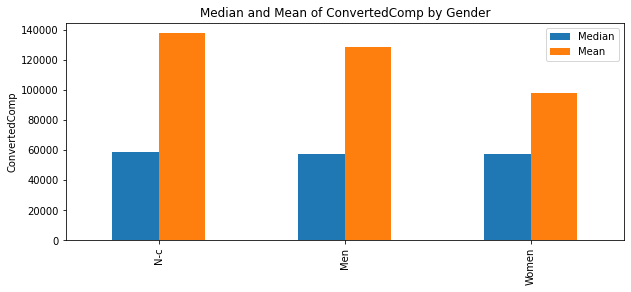

Man               0.925274
Woman             0.064585
Non-conforming    0.010141
Name: Gender, dtype: float64

In [16]:
df_gens_comp_stats.plot(kind='bar',
                        figsize=(10,4))
plt.title('Median and Mean of ConvertedComp by Gender')
plt.ylabel('ConvertedComp')
plt.show()

df.Gender.value_counts(normalize=True)

**3.3. Age**

In [17]:
pd.DataFrame(df.Age.describe())

,Age
count,11241.000000
mean,30.783031
std,7.350476
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


In [18]:
df[df['Age'] >= 70].Age.value_counts()

71.0    2
72.0    1
99.0    1
Name: Age, dtype: int64

We have only 4 observations with Age 70+.

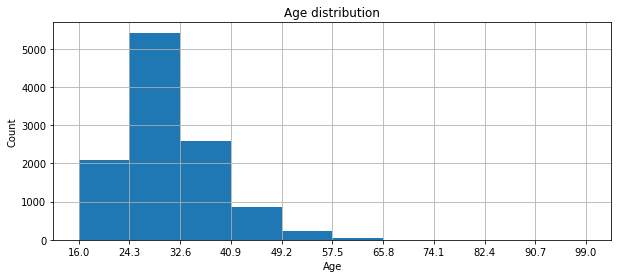

In [19]:
count, bin_edges = np.histogram(df.Age)

df.Age.plot(kind='hist', 
            xticks=bin_edges,
            figsize=(10,4),
            grid=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

## 4. Outliers

**4.1. ConvertedComp**

Text(0.5, 0, 'Salary')

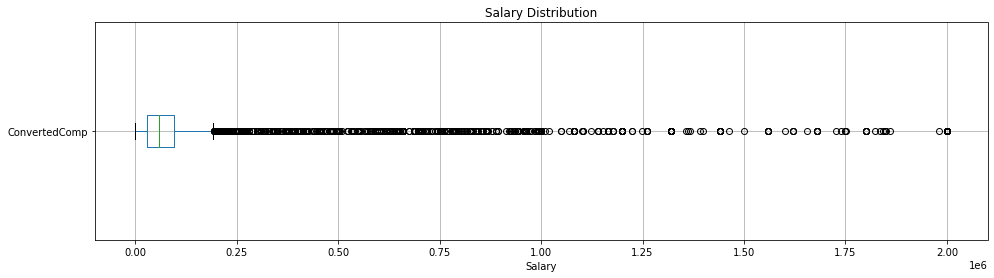

In [20]:
df.boxplot(column='ConvertedComp',
           vert=False,
           figsize=(16,4))
plt.title('Salary Distribution')
plt.xlabel('Salary')

In [21]:
#Interquartile Range
cc_1Q = df.ConvertedComp.quantile(q=0.25)
cc_3Q = df.ConvertedComp.quantile(q=0.75)

cc_IQR = cc_3Q - cc_1Q
cc_IQR

65864.0

In [22]:
#Upper and lower bounds
cc_upper_bound = cc_3Q + 1.5 * cc_IQR
cc_lower_bound = cc_1Q - 1.5 * cc_IQR

print('upper bound:', cc_upper_bound,
      '\nlower_bound:', cc_lower_bound)

upper bound: 193796.0 
lower_bound: -69660.0


In [23]:
cc_outliers = df['ConvertedComp'] > cc_upper_bound
cc_outliers.value_counts()

#The lower bound is -69660, whereas it is not possible to earn less than 0. 
#This is consistent with the min value for ConvertedComp being 0, and the 
#boxplot itself. There are no outliers below the lower bound.

False    10320
True       921
Name: ConvertedComp, dtype: int64

In [24]:
#Outliers as % of total
round((cc_outliers.value_counts()[1]/cc_outliers.value_counts()[0])*100,2)

8.92

In [25]:
#ConvertedComp mean before dropping outliers
df.ConvertedComp.mean()

126627.4996886398

In [26]:
#Removing outliers
df.drop(df.loc[df['ConvertedComp'] > cc_upper_bound].index, inplace=True)

#ConvertedComp mean after dropping outliers
df.ConvertedComp.mean()

59109.78391472868

**4.2. Age**

Text(0.5, 0, 'Age')

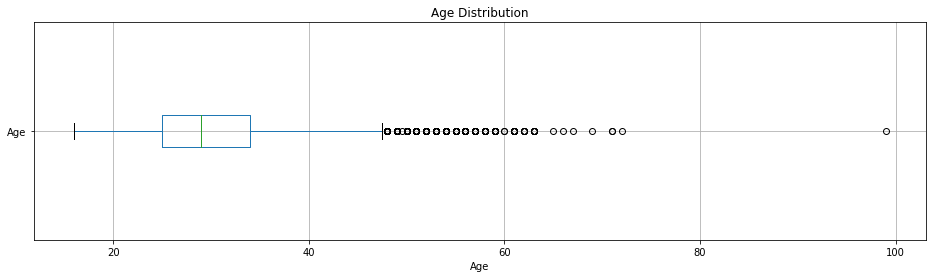

In [27]:
df.boxplot(column='Age',
           vert=False,
           figsize=(16,4))
plt.title('Age Distribution')
plt.xlabel('Age')

In [28]:
#Interquartile Range
age_1Q = df.Age.quantile(q=0.25)
age_3Q = df.Age.quantile(q=0.75)

age_IQR = age_3Q - age_1Q
age_IQR

9.0

In [29]:
#Upper and lower bounds
age_upper_bound = age_3Q + 1.5 * age_IQR
age_lower_bound = age_1Q - 1.5 * age_IQR

print('upper bound:', age_upper_bound,
      '\nlower_bound:', age_lower_bound)

upper bound: 47.5 
lower_bound: 11.5


In [30]:
age_outliers = df['Age'] > age_upper_bound
age_outliers.value_counts()

#No outliers below the lower bound.

False    9963
True      357
Name: Age, dtype: int64

In [31]:
#Outliers as % of total
round((age_outliers.value_counts()[1]/age_outliers.value_counts()[0])*100,2)

3.58

In [32]:
#Age mean and median before dropping outliers
print('mean: ', df.Age.mean(), '\n', 
      'median: ', df.Age.median(), sep="")

mean: 30.62477067183462
median: 29.0


In [33]:
#Removing outliers
df2 = df[df.Age < age_upper_bound]

#Age mean after dropping outliers
print('mean: ', df2.Age.mean(), '\n', 
      'median: ', df2.Age.median(), sep="")

mean: 29.838951348457467
median: 29.0


Outliers in Age represent 3.58% of all records which is not that much. Dropping records above the upper bound has minimal impact on the dataset. 

Obviously, the market is dominated by the young. However, the older developers are still active and we would not have the whole picture when excluding them.

## 5. Correlation

**5.1. Pearson Correlation (standard correlation coefficient)**

In [34]:
df.corr(method='pearson')[['ConvertedComp']]

,ConvertedComp
Unnamed: 0,0.012257
Respondent,0.012389
YearsCode,0.379419
CompTotal,-0.064046
ConvertedComp,1.000000
WorkWeekHrs,0.141138
CodeRevHrs,-0.084451
Age,0.378494
NormAnnualComp,-0.086973


Pearson correlation between ConvertedComp and:
* Age equals 0.378, weak positive correlation,
* YearsCode equals 0.379, weak positive correlation.

**5.2. Spearman Correlation**

In [35]:
df.corr(method='spearman')[['ConvertedComp']]

,ConvertedComp
Unnamed: 0,0.011159
Respondent,0.011159
YearsCode,0.385843
CompTotal,0.427956
ConvertedComp,1.000000
WorkWeekHrs,0.075305
CodeRevHrs,-0.067072
Age,0.401122
NormAnnualComp,0.107962


Spearman correlation between ConvertedComp and:
* Age equals 0.401, medium positive correlation,
* YearsCode equals 0.386, weak positive correlation.

**5.3. Scatterplots**

Given the coefficients are weak/medium, the scatterplots are not that meaningful. I am including them only for the sake of my skills demonstration.

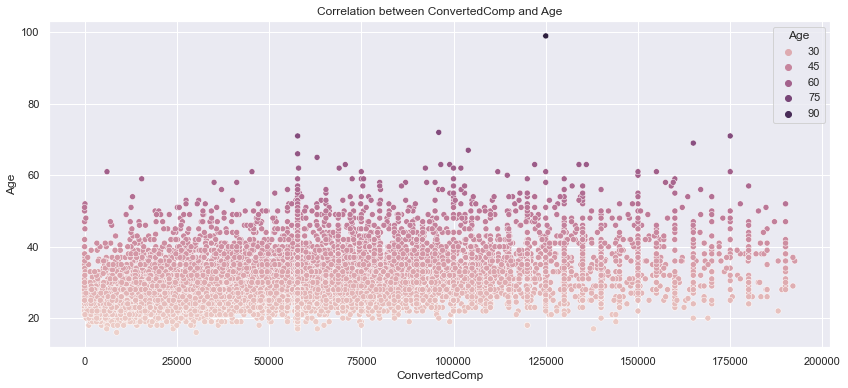

In [36]:
sns.set(rc={'figure.figsize':(14,6)})
sns.scatterplot(data=df,
                x='ConvertedComp',
                y='Age',
                hue='Age')
plt.title('Correlation between ConvertedComp and Age')
plt.show()                

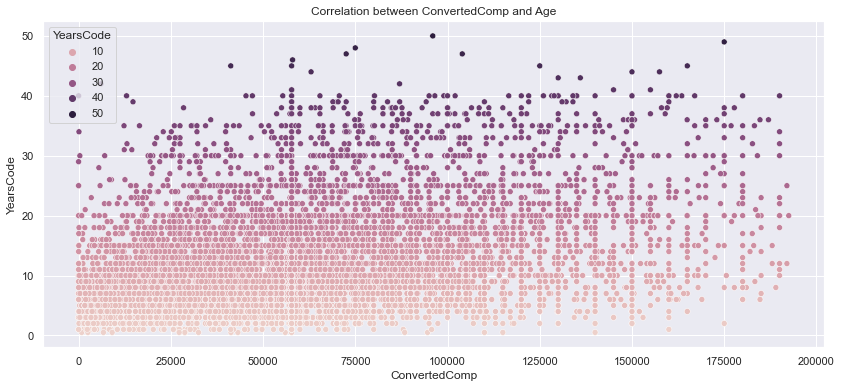

In [37]:
sns.set(rc={'figure.figsize':(14,6)})
sns.scatterplot(data=df,
                x='ConvertedComp',
                y='YearsCode',
                hue='YearsCode')
plt.title('Correlation between ConvertedComp and Age')
plt.show()      

## 6. Summary

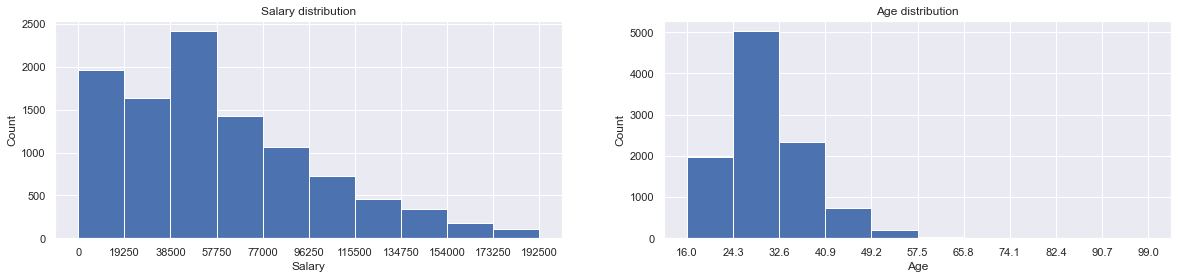

In [38]:
#Figure 1
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

#Subplot 1
count, bin_edges = np.histogram(df.ConvertedComp)

df.ConvertedComp.plot(kind='hist', 
                      xticks=bin_edges,
                      ax=ax0,
                      figsize=(20,4),
                      grid=True)
ax0.set_title('Salary distribution')
ax0.set_xlabel('Salary')
ax0.set_ylabel('Count')

#Subplot 2
count, bin_edges = np.histogram(df.Age)

df.Age.plot(kind='hist', 
            xticks=bin_edges,
            ax=ax1,
            figsize=(20,4),
            grid=True)
ax1.set_title('Age distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

plt.show()

In [39]:
cc_stats('ConvertedComp')

,Value
Count,10320.0
Mean,59109.8
Median,57287.0
Std,40607.7
Min,0.0
Max,192500.0
Kurtosis,0.2


In [40]:
cc_stats('Age')

,Value
Count,10320.0
Mean,30.6
Median,29.0
Std,7.3
Min,16.0
Max,99.0
Kurtosis,2.5


After removing outliers, Salary distribution plot is right-skewed, bimodal. Mean is consistent with median and kurtosis is much lower.

No outliers were removed from Age due to the reasons already explained above.

## 7. Save

In [41]:
df.to_csv(r'C:\Users\krzys\Desktop\Python\IBM DA Capstone Project_Portfolio version\2. Data_preparation\survey_data_cleaned_ver2.csv')